# Challenge Set 1
Topic:        Explore MTA turnstile data
Date:         27/09/2016
Name:         Bob Y. Tian
Worked with:  nobody

# Exercise 1.1

In [119]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import time as tm
import csv
from dateutil import parser as psr
import pandas as pd

In [26]:
#Open 3 data files and read them into the dictionary in order
filelist = ['turnstile_160903.txt','turnstile_160910.txt','turnstile_160917.txt']
datadict = {};
for filename in filelist:
    with open(filename,'r') as filecsv:
        dataset = csv.reader(filecsv, dialect='excel')
        next(dataset, None)  # skip the headers
        for line in dataset:
            key = tuple(line[0:4])
            value = map(str.strip, line[4:])
            if key in datadict:
                datadict[key].append(value)
            else:
                datadict[key] = [value]

In [28]:
datadict[('TRAM2', 'R469', '00-05-01', 'RIT-ROOSEVELT')][0:10]

[['R', 'RIT', '08/27/2016', '01:00:00', 'REGULAR', '0000005554', '0000000257'],
 ['R', 'RIT', '08/27/2016', '05:00:00', 'REGULAR', '0000005554', '0000000257'],
 ['R', 'RIT', '08/27/2016', '09:00:00', 'REGULAR', '0000005554', '0000000257'],
 ['R', 'RIT', '08/27/2016', '13:00:00', 'REGULAR', '0000005554', '0000000257'],
 ['R', 'RIT', '08/27/2016', '17:00:00', 'REGULAR', '0000005554', '0000000257'],
 ['R', 'RIT', '08/27/2016', '21:00:00', 'REGULAR', '0000005554', '0000000257'],
 ['R', 'RIT', '08/28/2016', '01:00:00', 'REGULAR', '0000005554', '0000000257'],
 ['R', 'RIT', '08/28/2016', '05:00:00', 'REGULAR', '0000005554', '0000000257'],
 ['R', 'RIT', '08/28/2016', '09:00:00', 'REGULAR', '0000005554', '0000000257'],
 ['R', 'RIT', '08/28/2016', '13:00:00', 'REGULAR', '0000005554', '0000000257']]

# Exercise 1.2

In [29]:
newdict = {}
for key in datadict:
    newdict[key] = []
    for i in range(len(datadict[key])):
        entries = int(datadict[key][i][5])
        time = psr.parse(datadict[key][i][2] + '-' + datadict[key][i][3])
        newdict[key].append([time, entries])        

In [30]:
newdict[('R206', 'R014', '02-03-03', 'FULTON ST')][0:10]

[[datetime.datetime(2016, 8, 27, 1, 0), 117613],
 [datetime.datetime(2016, 8, 27, 5, 0), 117616],
 [datetime.datetime(2016, 8, 27, 9, 0), 117632],
 [datetime.datetime(2016, 8, 27, 13, 0), 117659],
 [datetime.datetime(2016, 8, 27, 17, 0), 117724],
 [datetime.datetime(2016, 8, 27, 21, 0), 117800],
 [datetime.datetime(2016, 8, 28, 1, 0), 117821],
 [datetime.datetime(2016, 8, 28, 5, 0), 117824],
 [datetime.datetime(2016, 8, 28, 9, 0), 117831],
 [datetime.datetime(2016, 8, 28, 13, 0), 117851]]

# Exercise 1.3

In [31]:
dailydict = {}
for key in newdict:
    dailydict[key] = []
    for i in range(1,len(newdict[key])):
        if newdict[key][i][0].date() != newdict[key][i-1][0].date():
            time = newdict[key][i][0]
            count = newdict[key][i][1]-newdict[key][i-1][1]
            dailydict[key].append([time, count])

In [34]:
dailydict[('R315', 'R406', '01-00-01', 'PROSPECT AV')][0:10]

[[datetime.datetime(2016, 8, 28, 1, 0), 42],
 [datetime.datetime(2016, 8, 29, 1, 0), 43],
 [datetime.datetime(2016, 8, 30, 1, 0), 63],
 [datetime.datetime(2016, 8, 31, 1, 0), 50],
 [datetime.datetime(2016, 9, 1, 1, 0), 48],
 [datetime.datetime(2016, 9, 2, 1, 0), 51],
 [datetime.datetime(2016, 9, 3, 1, 0), 61],
 [datetime.datetime(2016, 9, 4, 1, 0), 39],
 [datetime.datetime(2016, 9, 5, 1, 0), 41],
 [datetime.datetime(2016, 9, 6, 1, 0), 46]]

# Exercise 1.4

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

In [36]:
def plot_entry(dict_value):
    dates, counts = map(list,zip(*dict_value))
    plt.figure(figsize=(10,3))
    plt.plot(dates,counts)
    plt.ylabel('Entries Count')
    plt.xlabel('Time')

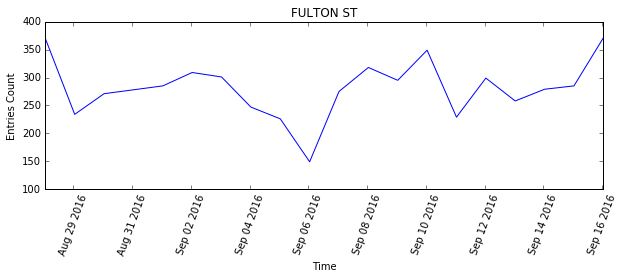

In [40]:
plot_entry(dailydict[('R206', 'R014', '02-03-03', 'FULTON ST')])
plt.title('FULTON ST');
plt.xticks(rotation=70);

# Exercise 1.5

In [41]:
dictCUS = {} #CA/Unit/Station dictionary (as opposed to CA/Unit/Station/TurnstileID)
for key in dailydict:
    newkey = (key[0],key[1],key[3]) #CA/Unit/Station key
    if newkey not in dictCUS: #check if the CA/Unit/Station is already there
        dictCUS[newkey] = dailydict[key]
    else:
        for itemCUS in dictCUS[newkey]:
            for item in dailydict[key]:
                if itemCUS[0] == item[0]:
                    itemCUS[1] += item[1]

In [43]:
dictCUS[('R206', 'R014', 'FULTON ST')][0:10]

[[datetime.datetime(2016, 8, 28, 1, 0), 719],
 [datetime.datetime(2016, 8, 29, 1, 0), 462],
 [datetime.datetime(2016, 8, 30, 1, 0), 525],
 [datetime.datetime(2016, 8, 31, 1, 0), 540],
 [datetime.datetime(2016, 9, 1, 1, 0), 551],
 [datetime.datetime(2016, 9, 2, 1, 0), 598],
 [datetime.datetime(2016, 9, 3, 1, 0), 590],
 [datetime.datetime(2016, 9, 4, 1, 0), 492],
 [datetime.datetime(2016, 9, 5, 1, 0), 445],
 [datetime.datetime(2016, 9, 6, 1, 0), 290]]

# Exercise 1.6

In [45]:
dictS = {} #CA/Unit/Station dictionary (as opposed to CA/Unit/Station/TurnstileID)
for key in dailydict:
    newkey = (key[3]) #CA/Unit/Station key
    if newkey not in dictS: #check if the CA/Unit/Station is already there
        dictS[newkey] = dailydict[key]
    else:
        for itemS in dictS[newkey]:
            for item in dailydict[key]:
                if itemS[0] == item[0]:
                    itemS[1] += item[1]
dictS[('FULTON ST')][0:10]

[[datetime.datetime(2016, 8, 28, 1, 0), 28275],
 [datetime.datetime(2016, 8, 29, 1, 0), 18122],
 [datetime.datetime(2016, 8, 30, 1, 0), 21715],
 [datetime.datetime(2016, 8, 31, 1, 0), 24408],
 [datetime.datetime(2016, 9, 1, 1, 0), 24351],
 [datetime.datetime(2016, 9, 2, 1, 0), 24298],
 [datetime.datetime(2016, 9, 3, 1, 0), 24854],
 [datetime.datetime(2016, 9, 4, 1, 0), 20646],
 [datetime.datetime(2016, 9, 5, 1, 0), 17309],
 [datetime.datetime(2016, 9, 6, 1, 0), 15022]]

# Exercise 1.7

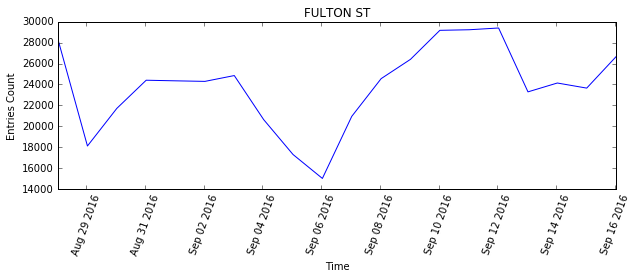

In [47]:
plot_entry(dictS[('FULTON ST')])
plt.title('FULTON ST');
plt.xticks(rotation=70);

# Exercise 1.8

In [102]:
dictWeek1 = {}
dictWeek2 = {}
dictWeek3 = {}
key = 'FULTON ST'
dates = [item[0] for item in dictS[key]]
counts = [item[1] for item in dictS[key]]
dictWeek1[key] = [0,0,0,0,0,0,0]
dictWeek2[key] = [0,0,0,0,0,0,0]
dictWeek3[key] = [0,0,0,0,0,0,0]
for i in range(7):
    dictWeek1[key][dates[i].weekday()] = counts[i]
for i in range(7,14):
    dictWeek2[key][dates[i].weekday()] = counts[i]
for i in range(14,20):
    dictWeek3[key][dates[i].weekday()] = counts[i]

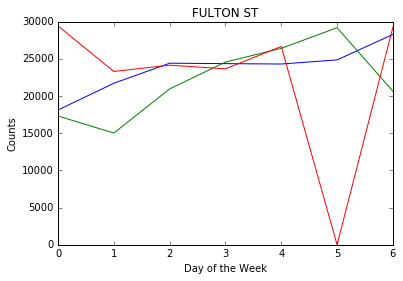

In [104]:
plt.plot(dictWeek1['FULTON ST']);
plt.plot(dictWeek2['FULTON ST']);
plt.plot(dictWeek3['FULTON ST']);
plt.ylabel('Counts');
plt.xlabel('Day of the Week');
plt.title('FULTON ST')

# Exercise 1.9

In [115]:
ridership = []
for key in dictS:
    counts = [item[1] for item in dictS[key]]
    ridership.append([key,sum(counts)])

In [134]:
pd.options.display.max_rows = 10
ridership_values = pd.DataFrame(ridership).sort_values([1],ascending=False)
print(ridership_values)

                   0        1
287  34 ST-HERALD SQ  1645662
43    TIMES SQ-42 ST  1577734
293   14 ST-UNION SQ  1347032
196   34 ST-PENN STA  1207445
229   59 ST COLUMBUS  1024307
..               ...      ...
32     ORCHARD BEACH        4
155  PENNSYLVANIA AV        0
272        THIRTY ST        0
315      SARATOGA AV        0
298     PATH NEW WTC        0

[374 rows x 2 columns]


# Exercise 1.10

(-1, 374)

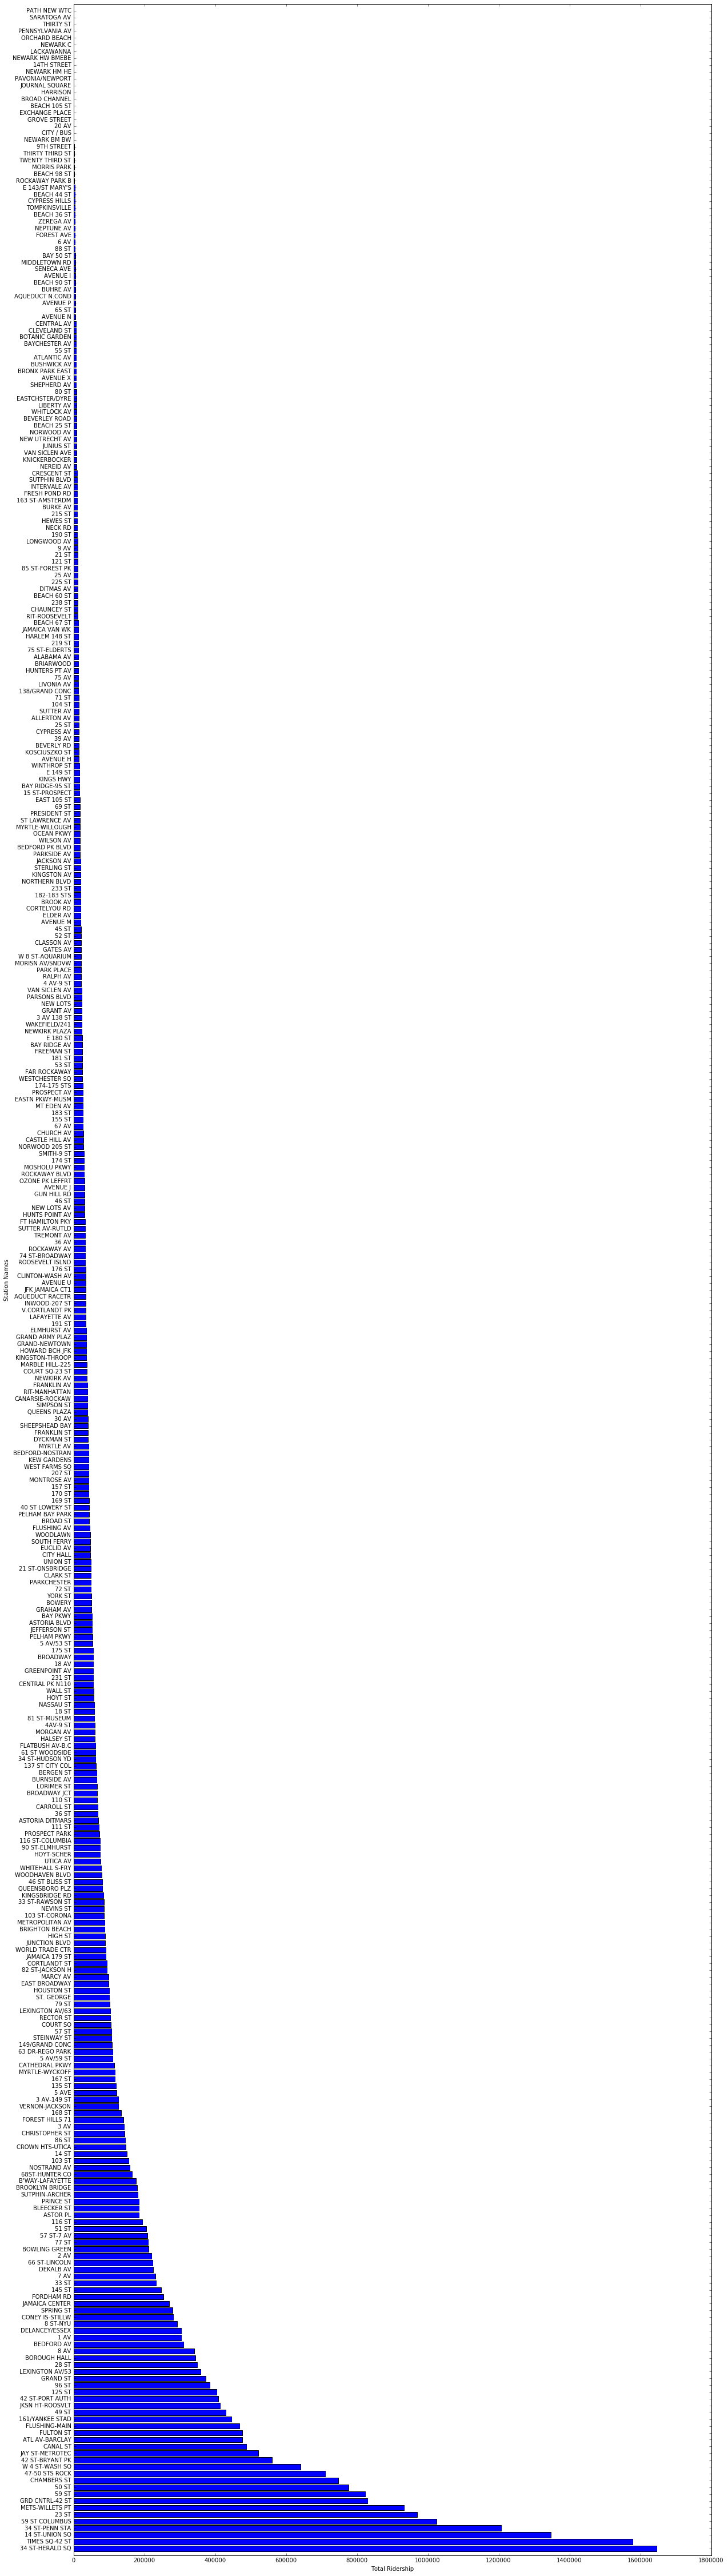

In [142]:
plt.figure(figsize=(20,80))
plt.barh(range(len(ridership_values)), ridership_values[1], align='center')
plt.yticks(range(len(ridership_values)), ridership_values[0], fontsize = 10)
plt.ylabel('Station Names')
plt.xlabel('Total Ridership')
plt.ylim(-1,len(ridership_values))